Processing 6.가전_29821_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1860579
Play time(s): 42.19


C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:73: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:73: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:73: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:73: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:74: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  pdf.savefig()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\865843385.py:74: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  pdf.savefig()
C:\Users\USER\AppData\

PermissionError: [Errno 13] Permission denied: './audio_processing.pdf'

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU})

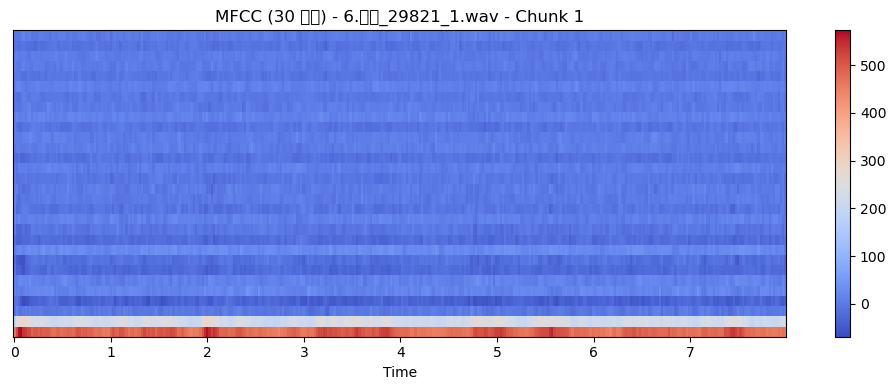

In [4]:
import os
import librosa
import librosa.display
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from matplotlib.backends.backend_pdf import PdfPages

# 한글로 쓰기
# plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

# 오디오 파일이 저장된 폴더 경로
folder_path = './wav/'

# # 폴더 내의 모든 파일을 반복 처리
# for filename in os.listdir(folder_path):
#     if filename.endswith('.wav'):
#         file_path = os.path.join(folder_path, filename)

# # 특정 오디오 파일 경로
file_path = './wav/6.가전_29821_1.wav'  # your_file.wav를 원하는 파일명으로 변경
output_file = './audio_processing.pdf'  # 결과를 저장할 PDF 파일 경로

# 파일 정보 출력
obj = wave.open(file_path, 'r')
print(f"Processing {os.path.basename(file_path)}")
print("Number of channels:", obj.getnchannels())
print("Sampling rate:", obj.getframerate())
print("Number of samples:", obj.getnframes())
print("Play time(s):", obj.getnframes() / obj.getframerate())
obj.close()

# WAV 파일 읽기
rate, data = wav.read(file_path)

# 데이터를 부동 소수점으로 변환
data = data.astype(np.float32)

# 스테레오인 경우 모노로 변환
if len(data.shape) > 1:
    data = librosa.to_mono(data.T)

# 오디오 파일 자르기
duration = data.shape[0] / rate  # 파일의 총 길이(초)
chunk_size = 4 * rate  # 4초에 해당하는 샘플 수
num_chunks = int(np.ceil(duration / 4))  # 총 몇 개의 4초 조각이 있는지

# PDF 파일 열기
with PdfPages(output_file) as pdf:
    for i in range(num_chunks):
        start_sample = i * chunk_size
        end_sample = min((i + 1) * chunk_size, data.shape[0])
        chunk_data = data[start_sample:end_sample]

        # # Plot for chunk data
        # plt.figure(figsize=(10, 4))
        # plt.plot(chunk_data)
        # plt.title(f'{os.path.basename(file_path)} - 모노 채널 - Chunk {i + 1}')
        # pdf.savefig()
        # plt.close()

        # Librosa를 사용하여 오디오 청크 처리
        y = chunk_data

        # MFCC 계산 (30개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=30, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC (30 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        # # MFCC 계산 (20개 계수)
        # mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=20, n_fft=1024, hop_length=512)
        # plt.figure(figsize=(10, 4))
        # librosa.display.specshow(mfcc_y, x_axis='time')
        # plt.colorbar()
        # plt.title(f'MFCC (20 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        # plt.tight_layout()
        # pdf.savefig()
        # plt.close()


In [11]:
import os
import librosa
import librosa.display
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from matplotlib.backends.backend_pdf import PdfPages

# 한글로 쓰기
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 특정 오디오 파일 경로
file_path = './wav/6.가전_5762_1.wav'  # your_file.wav를 원하는 파일명으로 변경
output_file = './audio_processing.pdf'  # 결과를 저장할 PDF 파일 경로

# 파일 정보 출력
obj = wave.open(file_path, 'r')
print(f"Processing {os.path.basename(file_path)}")
print("Number of channels:", obj.getnchannels())
print("Sampling rate:", obj.getframerate())
print("Number of samples:", obj.getnframes())
print("Play time(s):", obj.getnframes() / obj.getframerate())
obj.close()

# WAV 파일 읽기
rate, data = wav.read(file_path)

# 데이터를 부동 소수점으로 변환
data = data.astype(np.float32)

# 스테레오인 경우 모노로 변환
if len(data.shape) > 1:
    data = librosa.to_mono(data.T)

# 오디오 파일 자르기
duration = data.shape[0] / rate  # 파일의 총 길이(초)
chunk_size = 4 * rate  # 4초에 해당하는 샘플 수
num_chunks = int(np.ceil(duration / 4))  # 총 몇 개의 4초 조각이 있는지

# PDF 파일 열기
with PdfPages(output_file) as pdf:
    for i in range(num_chunks):
        start_sample = i * chunk_size
        end_sample = min((i + 1) * chunk_size, data.shape[0])
        chunk_data = data[start_sample:end_sample]

        # 시간 축 생성 (0초에서 4초로 설정)
        time_axis = np.arange(start_sample, end_sample) / rate
        time_axis = time_axis - time_axis[0]  # 시작 시간을 0초로 맞춤

        # Plot for chunk data
        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, chunk_data)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'{os.path.basename(file_path)} - 모노 채널 - Chunk {i + 1}')
        pdf.savefig()
        plt.close()

        # Librosa를 사용하여 오디오 청크 처리
        y = chunk_data

        # MFCC 계산 (40개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=40, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, sr=rate, x_axis='time', hop_length=512)
        plt.colorbar()
        plt.title(f'MFCC (40 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        # MFCC 계산 (20개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=20, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, sr=rate, x_axis='time', hop_length=512)
        plt.colorbar()
        plt.title(f'MFCC (20 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        pdf.savefig()
        plt.close()


Processing 6.가전_5762_1.wav
Number of channels: 2
Sampling rate: 44100
Number of samples: 895230
Play time(s): 20.3


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# 한글로 쓰기
plt.rc('font', family='Malgun Gothic')
# 그래프에서 - 표시
plt.rcParams['axes.unicode_minus'] = False

# 오디오 파일이 저장된 폴더 경로
folder_path = 'ㅠ  # 오디오 파일들이 있는 폴더 경로

# 최대 100개의 파일 처리
files = [f for f in os.listdir(folder_path) if f.endswith('.wav')][:100]

# 폴더 내의 모든 파일을 반복 처리
for filename in files:
    file_path = os.path.join(folder_path, filename)
    output_folder = os.path.splitext(filename)[0] + '_results'  # 결과를 저장할 폴더 경로

    # 결과 폴더가 없으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 파일 정보 출력
    obj = wave.open(file_path, 'r')
    print(f"Processing {os.path.basename(file_path)}")
    print("Number of channels:", obj.getnchannels())
    print("Sampling rate:", obj.getframerate())
    print("Number of samples:", obj.getnframes())
    print("Play time(s):", obj.getnframes() / obj.getframerate())
    obj.close()

    # WAV 파일 읽기
    rate, data = wav.read(file_path)

    # 데이터를 부동 소수점으로 변환
    data = data.astype(np.float32)

    # 스테레오인 경우 모노로 변환
    if len(data.shape) > 1:
        data = librosa.to_mono(data.T)

    # 오디오 파일 자르기
    duration = data.shape[0] / rate  # 파일의 총 길이(초)
    chunk_size = 4 * rate  # 4초에 해당하는 샘플 수
    num_chunks = int(np.ceil(duration / 4))  # 총 몇 개의 4초 조각이 있는지

    for i in range(num_chunks):
        start_sample = i * chunk_size
        end_sample = min((i + 1) * chunk_size, data.shape[0])
        chunk_data = data[start_sample:end_sample]

        # 시간 축 생성 (0초에서 4초로 설정)
        time_axis = np.arange(start_sample, end_sample) / rate
        time_axis = time_axis - time_axis[0]  # 시작 시간을 0초로 맞춤

        # Plot for chunk data
        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, chunk_data)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'{os.path.basename(file_path)} - 모노 채널 - Chunk {i + 1}')
        plt.savefig(os.path.join(output_folder, f'{os.path.basename(file_path)}_mono_channel_chunk_{i + 1}.png'))
        plt.close()

        # Librosa를 사용하여 오디오 청크 처리
        y = chunk_data

        # MFCC 계산 (40개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=40, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, sr=rate, x_axis='time', hop_length=512)
        plt.colorbar()
        plt.title(f'MFCC (40 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f'{os.path.basename(file_path)}_mfcc_40_chunk_{i + 1}.png'))
        plt.close()

        # MFCC 계산 (20개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=20, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, sr=rate, x_axis='time', hop_length=512)
        plt.colorbar()
        plt.title(f'MFCC (20 계수) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f'{os.path.basename(file_path)}_mfcc_20_chunk_{i + 1}.png'))
        plt.close()


Processing 6.가전_18964_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 445376
Play time(s): 10.09922902494331
Processing 6.가전_19212_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 784539
Play time(s): 17.79
Processing 6.가전_19214_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1997289
Play time(s): 45.29
Processing 6.가전_19366_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 606375
Play time(s): 13.75
Processing 6.가전_19367_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1159389
Play time(s): 26.29
Processing 6.가전_19368_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1154979
Play time(s): 26.19
Processing 6.가전_19632_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 674730
Play time(s): 15.3
Processing 6.가전_19848_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 795123
Play time(s): 18.03
Processing 6.가전_19861_1.wav
Number of channels: 1


#### 최종

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# 그래프에 - 표시
plt.rcParams['axes.unicode_minus'] = False

# 오디오 파일이 저장된 폴더 경로
folder_path = './wav/'  # 오디오 파일들이 있는 폴더 경로
output_folder = './results/'  # 모든 결과 이미지를 저장할 폴더 경로

# 결과 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 최대 100개의 파일 처리
files = [f for f in os.listdir(folder_path) if f.endswith('.wav')][:100]

# 폴더 내의 모든 파일을 반복 처리
for filename in files:
    file_path = os.path.join(folder_path, filename)

    # 파일 정보 출력
    obj = wave.open(file_path, 'r')
    print(f"Processing {os.path.basename(file_path)}")
    print("Number of channels:", obj.getnchannels())
    print("Sampling rate:", obj.getframerate())
    print("Number of samples:", obj.getnframes())
    print("Play time(s):", obj.getnframes() / obj.getframerate())
    obj.close()

    # WAV 파일 읽기
    rate, data = wav.read(file_path)

    # 데이터를 부동 소수점으로 변환
    data = data.astype(np.float32)

    # 스테레오인 경우 모노로 변환
    if len(data.shape) > 1:
        data = librosa.to_mono(data.T)

    # 오디오 파일 자르기
    duration = data.shape[0] / rate  # 파일의 총 길이(초)
    chunk_size = 4 * rate  # 4초에 해당하는 샘플 수
    num_chunks = int(np.ceil(duration / 4))  # 총 몇 개의 4초 조각이 있는지

    for i in range(num_chunks):
        start_sample = i * chunk_size
        end_sample = min((i + 1) * chunk_size, data.shape[0])
        chunk_data = data[start_sample:end_sample]

        # 시간 축 생성 (0초에서 4초로 설정)
        time_axis = np.arange(start_sample, end_sample) / rate
        time_axis = time_axis - time_axis[0]  # 시작 시간을 0초로 맞춤


        # Librosa를 사용하여 오디오 청크 처리
        y = chunk_data

        # MFCC 계산 (30개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=rate, n_mfcc=30, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, sr=rate, x_axis='time', hop_length=512)
        plt.colorbar()
        plt.title(f'MFCC (30) - {os.path.basename(file_path)} - Chunk {i + 1}')
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_mfcc_40_chunk_{i + 1}.png'))
        plt.close()

Processing 6.가전_18964_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 445376
Play time(s): 10.09922902494331


C:\Users\USER\AppData\Local\Temp\ipykernel_11668\3464936056.py:70: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\3464936056.py:70: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\3464936056.py:71: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.savefig(os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_mfcc_40_chunk_{i + 1}.png'))
C:\Users\USER\AppData\Local\Temp\ipykernel_11668\3464936056.py:71: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.savefig(os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_mfcc_40_chunk_{i + 1}.png'))


Processing 6.가전_19212_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 784539
Play time(s): 17.79
Processing 6.가전_19214_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1997289
Play time(s): 45.29
Processing 6.가전_19366_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 606375
Play time(s): 13.75
Processing 6.가전_19367_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1159389
Play time(s): 26.29
Processing 6.가전_19368_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 1154979
Play time(s): 26.19
Processing 6.가전_19632_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 674730
Play time(s): 15.3
Processing 6.가전_19848_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 795123
Play time(s): 18.03
Processing 6.가전_19861_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 835165
Play time(s): 18.93798185941043
Processing 6.가전_20380_1.wav
Number of channels: 1
